In [1]:
from glob import glob
from pprint import pprint
from random import sample

import matplotlib.pyplot as plt
from numpy import mean

import texte

In [2]:
# with open("LGERM.json", encoding="utf-8") as f:
#     LGERM = json.load(f)
# mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


In [3]:
texte.corpora(path)

<generator object corpora at 0x7f87a1f33f10>

Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


In [4]:
sample_mode = True

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = [e for e in texte.corpora(files) if e.plain]


100%|██████████| 200/200 [00:03<00:00, 57.51it/s]


collection_textes[0].texte

In [5]:
import json

lst = [[files[i], e.header, e.texte] for i, e in enumerate(collection_textes)]

with open("headers.json", "w") as f:
    json.dump(lst, f, indent=4, ensure_ascii=False)

In [6]:
import pandas as pd

df0 = pd.DataFrame(txt.header for txt in collection_textes)
df = pd.DataFrame(
    ((txt.path.name, txt.n_pages, txt.hapax_ratio, txt.ttr, txt.lexicalite) for txt in collection_textes),
    columns = ["fichier", "n_pages", "hapax_ratio", "ttr", "lexicalite"]
)
concat = pd.concat([df, df0], axis=1)

In [7]:
concat.drop("titre", axis=1).to_csv("stats.csv", sep=";")

In [8]:
concat

,fichier,n_pages,hapax_ratio,ttr,lexicalite,form,genre,handwritten_note,table_of_content,illustration,creation,change,titre,dates,langue,fichier,langue_detectee,subject
0,Moreau3161_GBOOKS.xml,8,0.666215,0.775712,0.121438,prose,"[narration, relation]",False,False,False,1652-07-02,"{'@status': 'corrected', '@when': '2022-10-25'...",Relation du secours jette dans Villeneuve d'Ag...,"{'@type': 'file_creation', '@when': '2022-10-2...",fra,Moreau3161_GBOOKS.xml,LGERM,NaN
1,Moreau87_GBOOKS.xml,7,0.577573,0.701452,0.110892,prose,"[réponse, pamphlet]",False,False,False,1649-03-04,"{'@status': 'corrected', '@when': '2022-10-25'...","L'antidésintéressé , ou l’Équitable censeur de...","{'@type': 'file_creation', '@when': '2022-10-2...",fra,Moreau87_GBOOKS.xml,LGERM,NaN
2,Moreau2suppl201_GALL.xml,5,0.688312,0.866290,0.088076,vers,"[poésie, burlesque, satirique]",False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-09-08'...","Les Ténebres de Mazarin, en vers burlesques.","[{'@type': 'file_creation', '@when': '2021-02-...",fra,Moreau2suppl201_GALL.xml,LGERM,None
3,Moreau2663_GBOOKS.xml,24,0.594473,0.721355,0.125480,prose,"[éloge, panégyrique, rhétorique épidictique]",False,False,False,1651-09-07,"{'@status': 'corrected', '@when': '2022-05-31'...",Panégyrique du roi très-chrétien Louis XIV Die...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau2663_GBOOKS.xml,LGERM,NaN
4,Moreau2204_GBOOKS.xml,15,0.647347,0.759857,0.124561,prose,"[lettre, faux, traduction]",False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-10-25'...","Lettre du sieur Mazarini au cardinal Mazarin, ...","{'@type': 'file_creation', '@when': '2022-10-2...",fra,Moreau2204_GBOOKS.xml,LGERM,Mazarin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Moreau3230_GBOOKS.xml,16,0.621626,0.721394,0.171920,prose,"[narration, récit]",False,False,False,1651-04-18,"{'@status': 'corrected', '@when': '2022-09-26'...",Relation véritable de ce qui s'est passé ès en...,"{'@type': 'file_creation', '@when': '2026-04-2...",fra,Moreau3230_GBOOKS.xml,LGERM,"[violences, Champagne]"
196,Moreau3747_GALL.xml,14,0.592890,0.719047,0.070726,vers,satirique,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-05-30'...","Le tableau du Gouvernement présent, ou Éloge d...","{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau3747_GALL.xml,LGERM,"Richelieu, Armand Jean Du Plessis, cardinal du..."
197,Moreau3720_MAZ.xml,27,0.684115,0.800094,0.092806,vers,"[burlesque, pro et contra]",False,False,False,1652-08-19,"{'@status': 'corrected', '@when': '2022-02-17'...","Le stratagème , ou le Pour et le contre du dép...","{'@type': 'file_creation', '@when': '2022-01-3...",fra,Moreau3720_MAZ.xml,LGERM,"[Turenne, Henri de La Tour d'Auvergne (1611-16..."
198,Moreau121_GALL.xml,9,0.635799,0.784376,0.079434,vers,non renseigné,False,False,False,NaN,"{'@status': 'corrected', '@when': '2021-11-12'...",Apologie pour la défense du cardinal Mazarin.,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau121_GALL.xml,LGERM,"[Anne d'Autriche, 1601-1666, Louis, roi de Fra..."


In [9]:
concat.to_csv("stats.csv", sep=";")


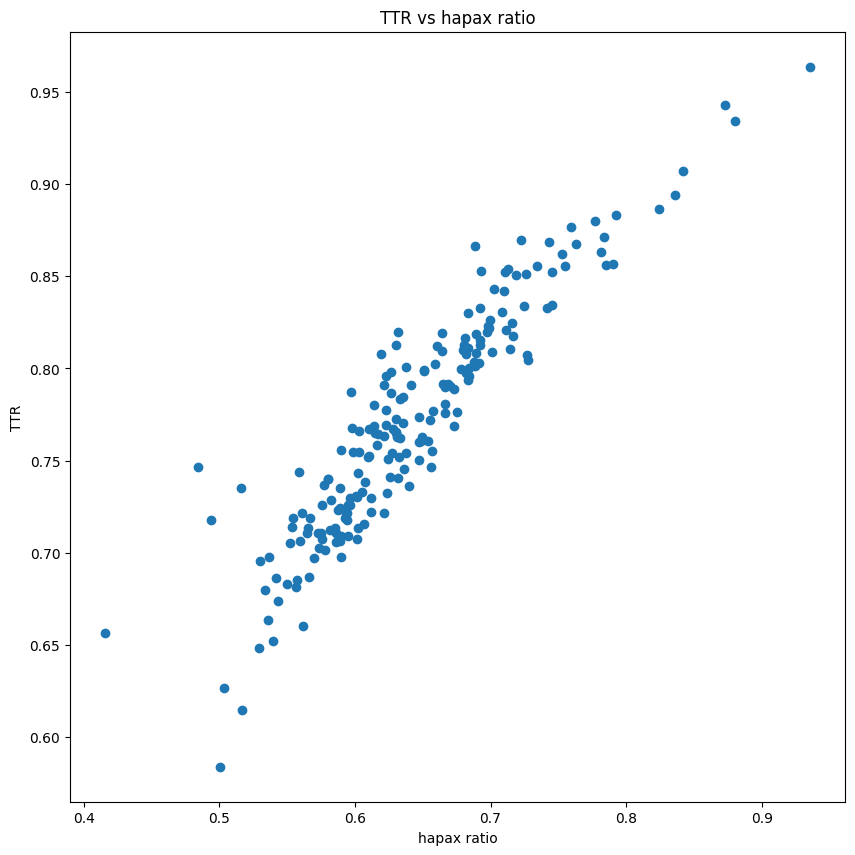

In [10]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

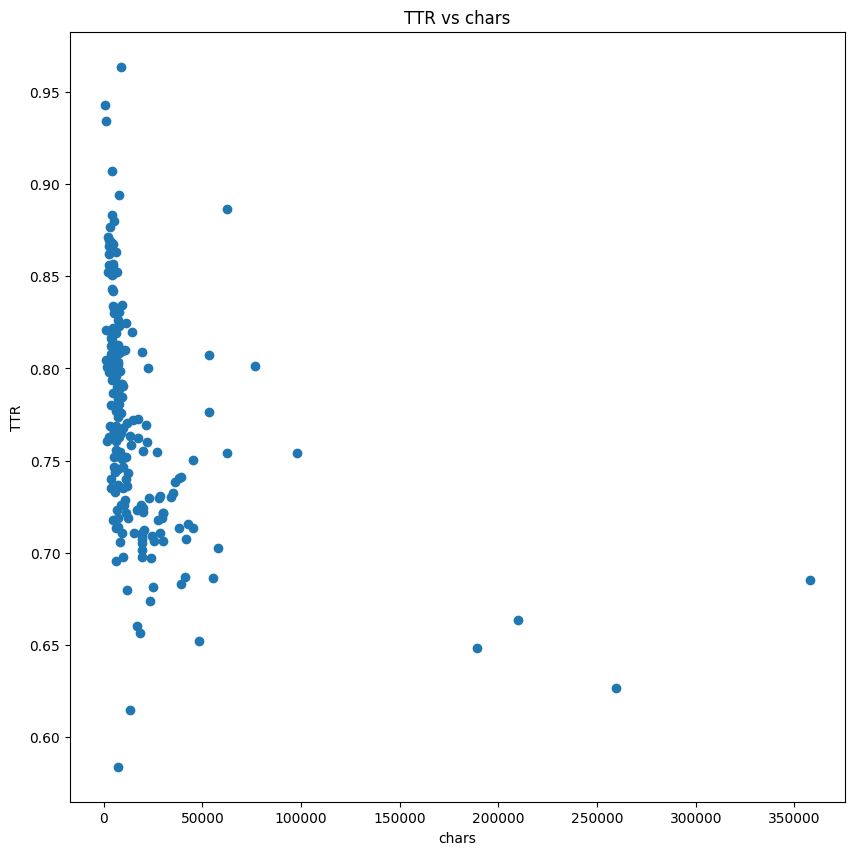

In [11]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [12]:
x = [txt.n_pages for txt in collection_textes]
print(mean(x))

13.935


In [13]:
mean([len(txt.texte) for txt in collection_textes])

13.935

In [39]:
x = [len(txt.plain) for txt in collection_textes]
print(mean(x))

19385.22


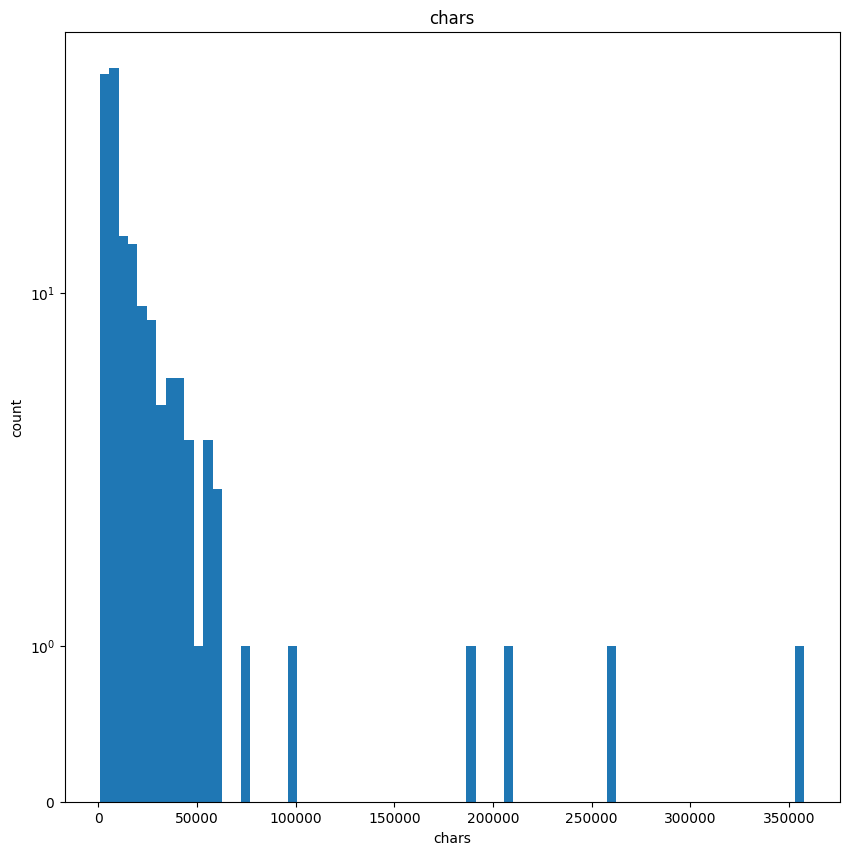

18909.46


In [15]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

print(mean(x))

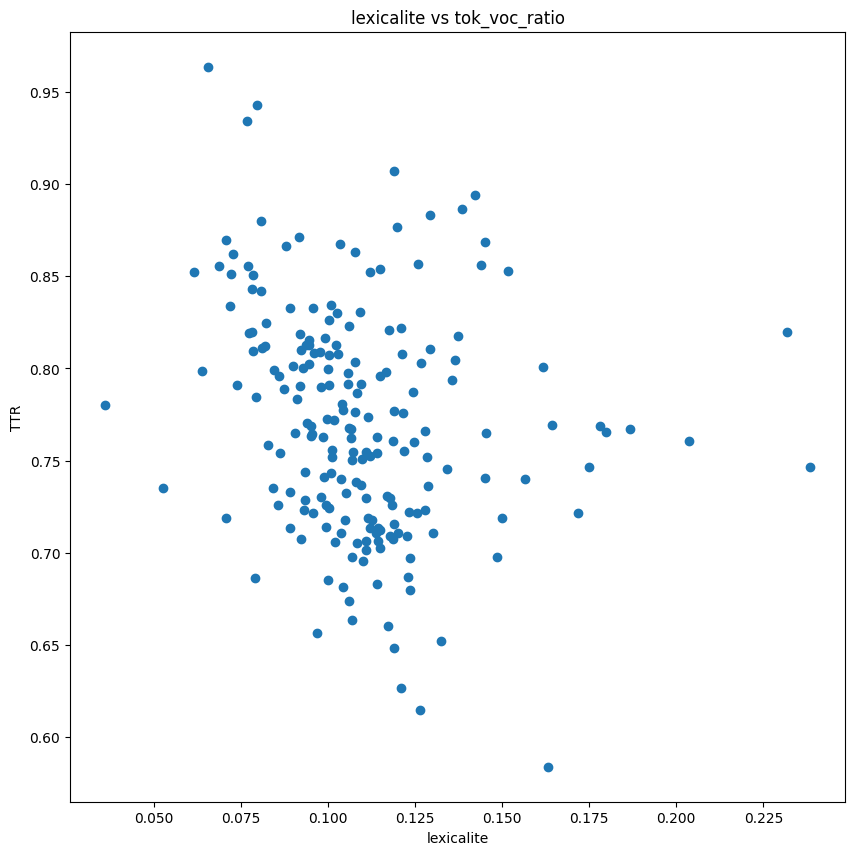

In [16]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [17]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"]
for txt in collection_textes]
len(x) / len([e for e in x if e == "corrected"])

1.0

In [18]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-10-25', '@who': 'AB'},
 'creation': '1652-07-02',
 'dates': {'#text': '25 octobre 2022',
           '@type': 'file_creation',
           '@when': '2022-10-25'},
 'fichier': 'Moreau3161_GBOOKS.xml',
 'form': 'prose',
 'genre': ['narration', 'relation'],
 'handwritten_note': False,
 'illustration': False,
 'langue': 'fra',
 'langue_detectee': 'LGERM',
 'table_of_content': False,
 'titre': "Relation du secours jette dans Villeneuve d'Agenois par\n"
          '          M. le comte de Marchin , lieutenant général des armées du '
          "roi sous l'autorité de M. le\n"
          '          Prince, avec la prise de La Serre Balthazar, près Bazas.'}


In [19]:
txt.ttr, txt.lexicalite

(0.7757121884287492, 0.12143828210127097)

In [20]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    # for k in stats:
    #     v = stats[k]
    #     v = [e for e in v if e]
    #     print(f"{k}: {mean(v):.3f}")
    #     stats[k] = v

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

prose: 0.761
vers: 0.812
('vers', 'prose'): 0.752


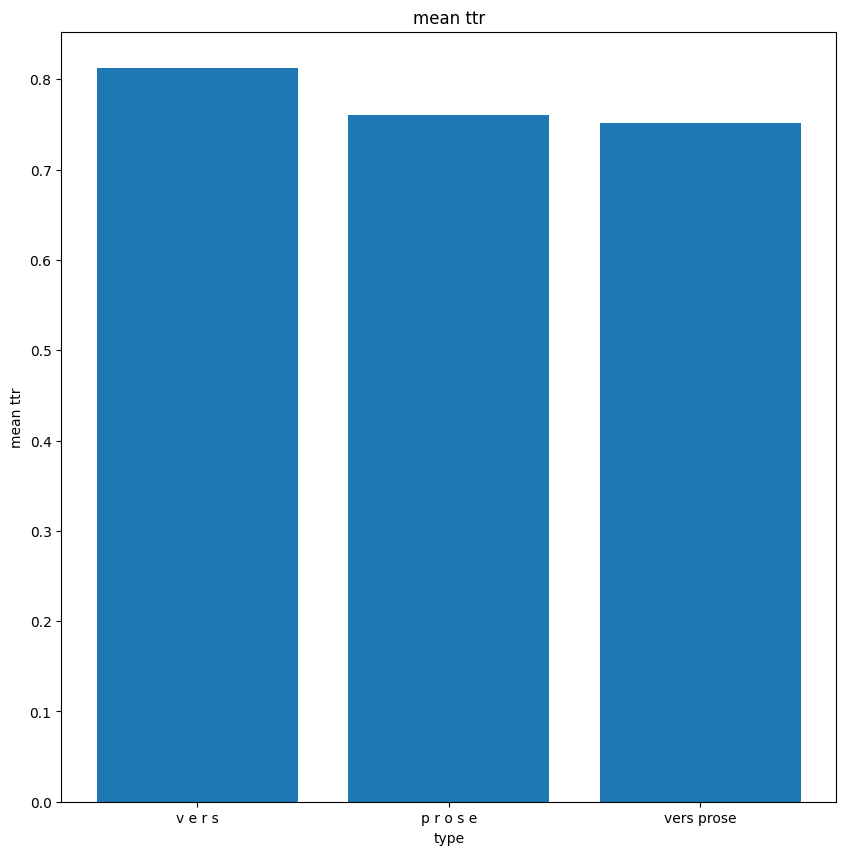

In [21]:
stats("ttr")


prose: 0.633
vers: 0.677
('vers', 'prose'): 0.617


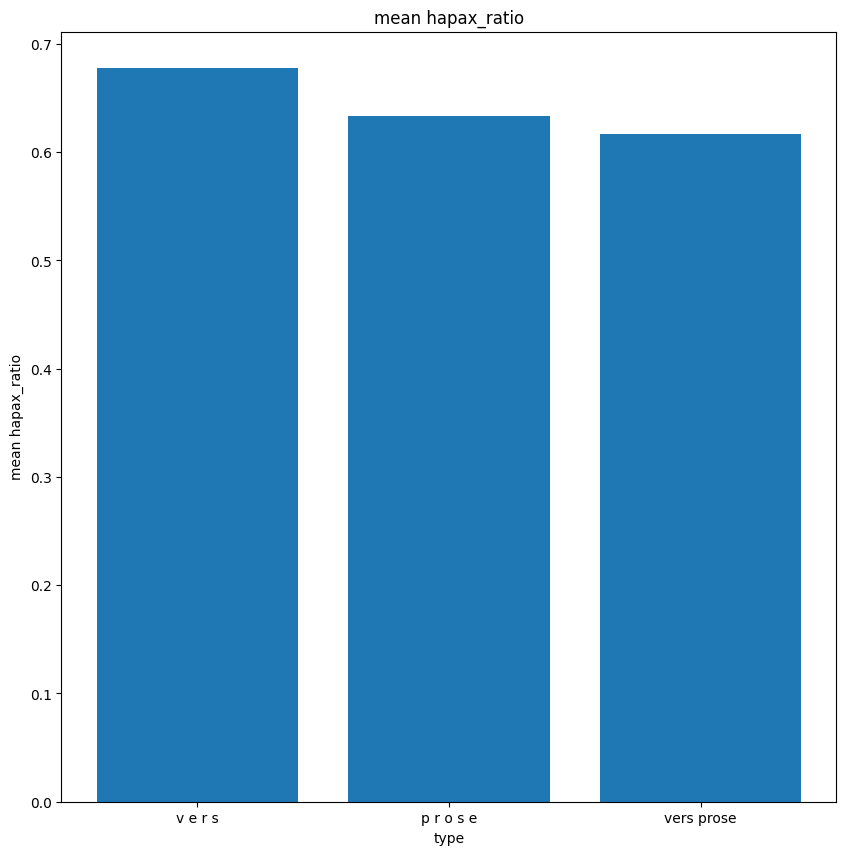

In [22]:
stats("hapax_ratio")

In [23]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel(f"{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


1652-07-02: 0.625
1649-03-04: 0.629
1651-09-07: 0.637
1649-08-18: 0.612
00-00-0000: 0.648
1652-08-07: 0.688
1652-10-13: 0.723
1649-03-15: 0.647
1652-01-09: 0.695
1649-09-05: 0.615
1649-02-19: 0.621
1650-10-01: 0.662
1652-08-26: 0.639
1652-08-19: 0.612
1648-04: 0.607
1652-10-06: 0.603
1649-03-22: 0.642
1650-07-04: 0.627
1651-10-08: 0.607
1652-04-01: 0.650
1652-07-04: 0.676
1651-03-11: 0.707
1651-07-06: 0.556
1650-05-09: 0.544
1651-04-05: 0.586
1649-01-11: 0.661
1649-02-08: 0.635
1651-04-18: 0.622


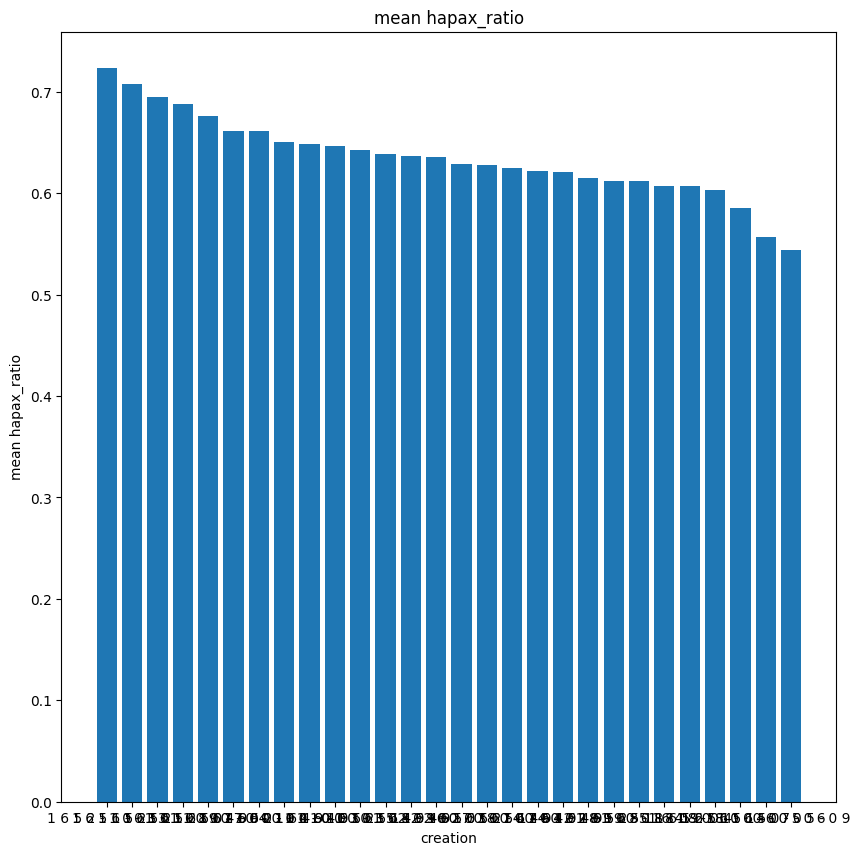

In [24]:
stats2("creation", "hapax_ratio")

1652-07-02: 0.749
1649-03-04: 0.766
1651-09-07: 0.767
1649-08-18: 0.752
00-00-0000: 0.787
1652-08-07: 0.804
1652-10-13: 0.825
1649-03-15: 0.782
1652-01-09: 0.803
1649-09-05: 0.739
1649-02-19: 0.750
1650-10-01: 0.779
1652-08-26: 0.774
1652-08-19: 0.745
1648-04: 0.740
1652-10-06: 0.728
1649-03-22: 0.780
1650-07-04: 0.753
1651-10-08: 0.750
1652-04-01: 0.771
1652-07-04: 0.805
1651-03-11: 0.841
1651-07-06: 0.682
1650-05-09: 0.674
1651-04-05: 0.708
1649-01-11: 0.806
1649-02-08: 0.770
1651-04-18: 0.721


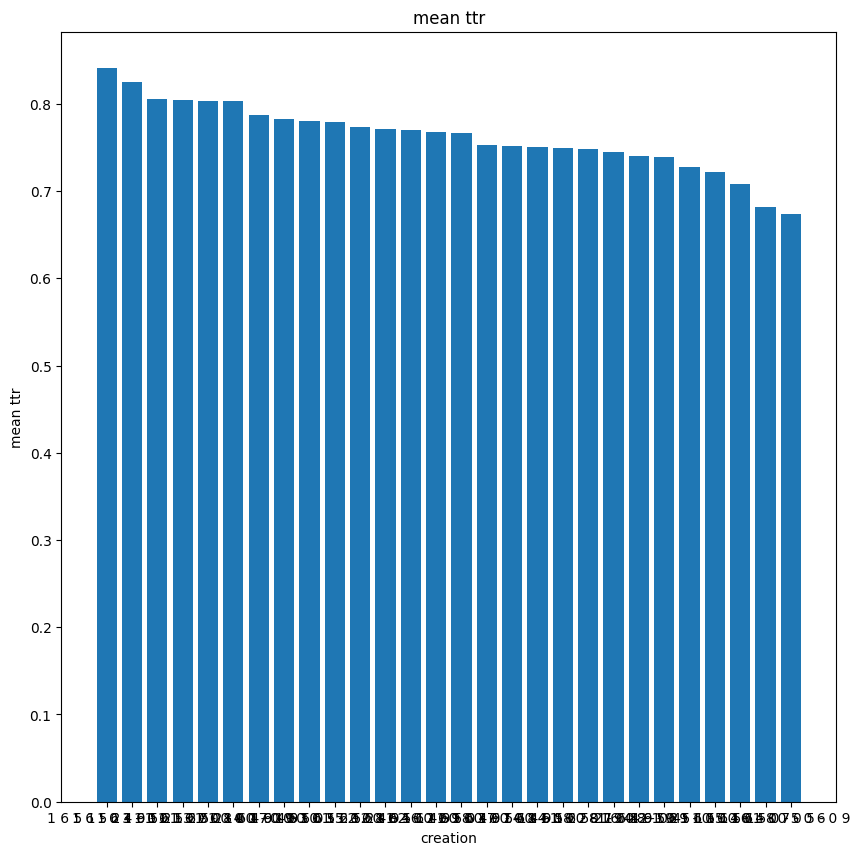

In [25]:
stats2("creation", "ttr")

False: 16624.056
True: 130894.250


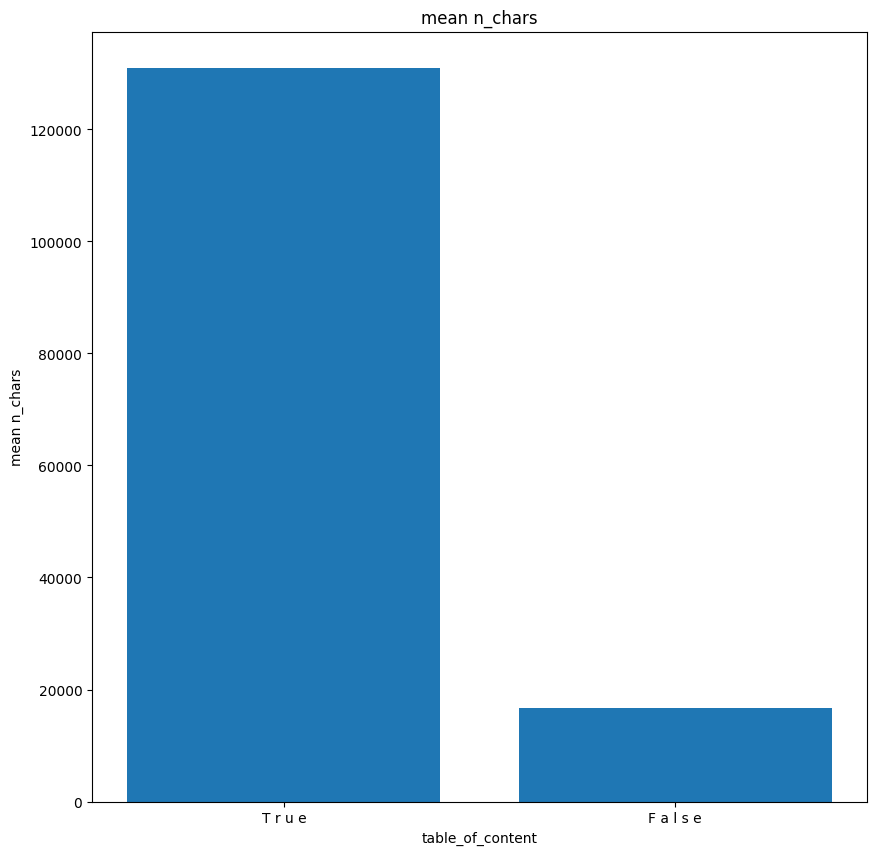

False: 0.773
True: 0.705


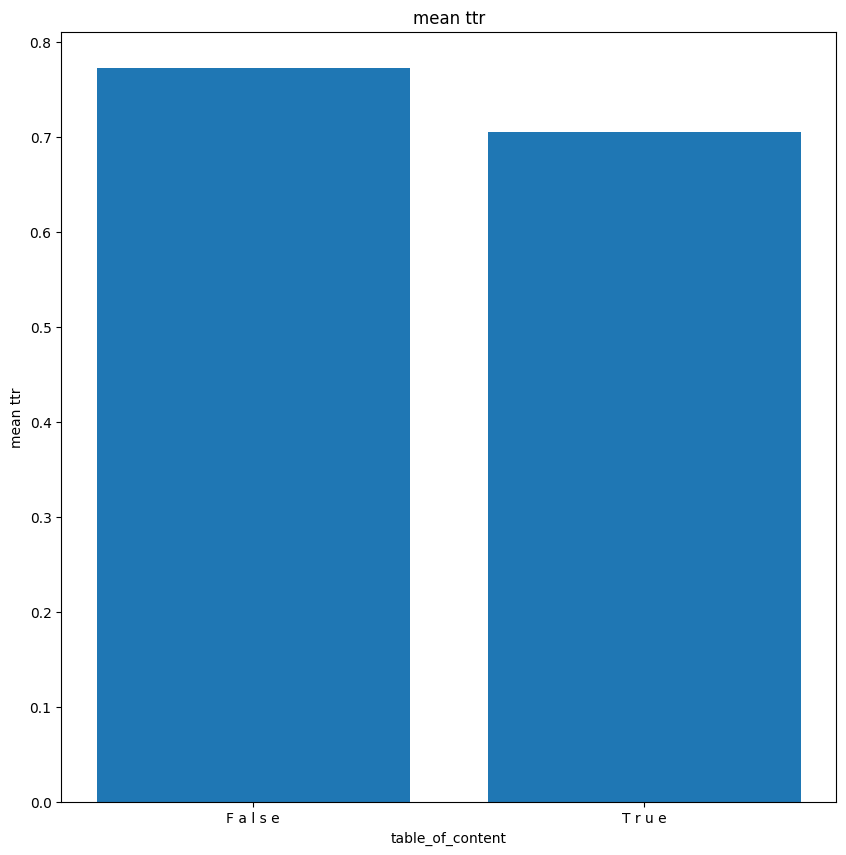

In [26]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")

In [27]:
import string

french_chars = {'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'œ', 'ù', 'û', 'ü', 'À', 'Â', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Î',
                'Ï', 'Ô',
                'Œ', 'Ù', 'Û', 'Ü', 'à', 'â', 'ä', 'æ', 'ç'}.union(set(string.printable))

"ſ" in french_chars, "a" in french_chars, "é" in french_chars, ":" in french_chars

(False, True, True, True)

In [28]:
def mot_is_french(mot):
    for char in mot:
        if char not in french_chars:
            return False
    return True

i, j, tot = 0, 0, 0

for txt in collection_textes:
    for page in txt.pages:
        for phrase in page:
            for mot in phrase.split():
                tot += 1
                if mot_is_french(mot):
                    i += 1
                else:
                    j += 1

print(i, j, tot, i / tot, j / tot)




3029713 189024 3218737 0.9412738599021915 0.05872614009780855


In [29]:
ttrlist = [(txt.ttr, i) for i, txt in enumerate(collection_textes) if txt.ttr]
hapaxlist = [(txt.hapax_ratio, i) for i, txt in enumerate(collection_textes) if txt.hapax_ratio]
lexicalitelist = [(txt.lexicalite, i) for i, txt in enumerate(collection_textes) if txt.lexicalite]


In [30]:
ttrlist = sorted(ttrlist, key=lambda x: x[0], reverse=True)
hapaxlist = sorted(hapaxlist, key=lambda x: x[0], reverse=True)
lexicalitelist = sorted(lexicalitelist, key=lambda x: x[0], reverse=True)


In [31]:
print(ttrlist[-1])
collection_textes[ttrlist[-1][1]].header

(0.5840163934426229, 68)


{'form': ['vers', 'prose'],
 'genre': ['placard', 'affiche', 'récit', 'chanson'],
 'subject': None,
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': 'gravure sur\n            bois',
 'change': {'@status': 'corrected', '@when': '2022-10-04', '@who': 'KA'},
 'titre': "RECIT Veritable du Duel arrivé entre deux soeurs, proche\n          de Bordeaux, l'une pour avoir pris le party & deffendu la Fronde & l'autre\n          l'Espée, dont l'avantage a esté emporté par la belle Frondeuse",
 'dates': {'@type': 'file_creation',
  '@when': '2022-09-14',
  '#text': '14 septembre 2022'},
 'langue': 'fra',
 'fichier': 'Labadie299_MAZ.xml',
 'langue_detectee': 'LGERM'}

In [32]:
print(ttrlist[0])
collection_textes[ttrlist[0][1]].header

(0.9636306789187367, 26)


{'form': 'prose',
 'genre': ['avis', 'traduction'],
 'subject': ['Gabriel Naudé', 'Bibliothèque'],
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-07', '@who': 'AB'},
 'titre': 'Gabrielis Naudæi Vermahnung an die Parlaments Herrn in\n          Parisz / über die Verkauffung der bibliothec des Herrn Cardinalis Mazarini geschehen am\n          29. Decembris 1652.',
 'dates': {'@type': 'file_creation',
  '@when': '2022-03-02',
  '#text': '2 mars 2022'},
 'langue': 'ger',
 'fichier': 'M15370_MAZ.xml',
 'langue_detectee': 'LGERM'}

In [33]:
print(hapaxlist[-1])
collection_textes[hapaxlist[-1][1]].header


(0.41585365853658535, 113)


{'form': 'vers',
 'genre': ['chanson', 'prophétique', 'triolet'],
 'subject': ['Nostradamus', 'Marigny', 'Mazarin', 'Cyrano de Bergerac'],
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-03-04',
 'change': {'@status': 'corrected', '@when': '2022-09-21', '@who': 'AB'},
 'titre': "Les triolets du temps, selon les visions d'un petit\n          fils du grand Nostradamus. Faits pour la consolation des bons François. Et dediés au\n          Parlement.",
 'dates': {'@type': 'file_creation',
  '@when': '2021-06-03',
  '#text': '3 juin 2021'},
 'langue': 'fra',
 'fichier': 'Moreau3859_GALL.xml',
 'langue_detectee': 'LGERM'}

In [34]:
print(hapaxlist[0])
collection_textes[hapaxlist[0][1]].header


(0.9354838709677419, 26)


{'form': 'prose',
 'genre': ['avis', 'traduction'],
 'subject': ['Gabriel Naudé', 'Bibliothèque'],
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-07', '@who': 'AB'},
 'titre': 'Gabrielis Naudæi Vermahnung an die Parlaments Herrn in\n          Parisz / über die Verkauffung der bibliothec des Herrn Cardinalis Mazarini geschehen am\n          29. Decembris 1652.',
 'dates': {'@type': 'file_creation',
  '@when': '2022-03-02',
  '#text': '2 mars 2022'},
 'langue': 'ger',
 'fichier': 'M15370_MAZ.xml',
 'langue_detectee': 'LGERM'}

In [35]:
print(lexicalitelist[-1])
collection_textes[lexicalitelist[-1][1]].header


(0.03607004210383203, 178)


{'form': 'prose',
 'genre': ['catéchisme', 'pamphlet'],
 'subject': None,
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-04-05', '@who': 'ZC'},
 'titre': 'Catéchisme des courtisans de la cour de Mazarin.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau651_GBOOKS.xml',
 'langue_detectee': 'LGERM'}

In [36]:
print(lexicalitelist[0])
collection_textes[lexicalitelist[0][1]].header


(0.2383255405968312, 76)


{'form': ['vers', 'prose'],
 'genre': 'lettre',
 'subject': None,
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-18',
 'change': {'@status': 'corrected', '@when': '2022-10-07', '@who': 'AB'},
 'titre': "Lettre de messieurs du Parlement de Normandie au roi,\n          touchant le refus de recevoir monsieur le comte d'Harcourt.",
 'dates': {'@type': 'file_creation',
  '@when': '2021-06-08',
  '#text': '8 juin 2021'},
 'langue': 'fra',
 'fichier': 'Moreau1968_GBOOKS.xml',
 'langue_detectee': 'LGERM'}

In [37]:
collection_textes[1876].lexicalite


IndexError: list index out of range

In [ ]:
to_save = [
    (ttrlist[-1][1], "ttr_min"),
    (ttrlist[0][1], "ttr_max"),
    (hapaxlist[-1][1], "hapax_min"),
    (hapaxlist[0][1], "hapax_max"),
    (lexicalitelist[-1][1], "lexicalite_min"),
    (lexicalitelist[0][1], "lexicalite_max"),
]

from pathlib import Path

Path("extremes").mkdir(parents=True, exist_ok=True)

for i, name in to_save:
    txt = collection_textes[i]
    with open(f"extremes/{name}.txt", "w") as f:
        f.write('\n'.join(txt.pages))


paragraphes = []
temp = ""
for e in txt.split("\n\n"):
    if len(e) < 10 :
        continue
    temp += e
    if len(temp) > 2000:
        paragraphes.append(temp)
        temp = ""
